In [21]:
import warnings

warnings.filterwarnings("ignore")

In [22]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Add every font at the specified location
font_dir = ["../fonts"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams["font.family"] = "umr10"
rcParams["font.size"] = 16

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

In [24]:
df_bicycle_dataset = pd.read_csv("../dataset/processed/processed_dataset.csv")
df_geo_location_bicycle_dataset = pd.read_csv(
    "../dataset/processed/processed_geolocation_dataset.csv"
)

In [25]:
# Loop through all columns and apply the string replacement method
for col in df_bicycle_dataset.columns:
    if (
        df_bicycle_dataset[col].dtype == "object"
    ):  # Only apply to columns with object dtype (string columns)
        df_bicycle_dataset[col] = df_bicycle_dataset[col].str.replace(
            "\xa0", " "
        )  # remove non-breaking spaces
        df_bicycle_dataset[col] = df_bicycle_dataset[
            col
        ].str.rstrip()  # Remove trailing spaces
        df_bicycle_dataset[col] = df_bicycle_dataset[col].str.rstrip(
            ","
        )  # Remove trailing commas

In [26]:
# Get unique values from "station_name" in dataframe1
df_geo = df_geo_location_bicycle_dataset["station_name"].unique()

# Get unique values from "rental_place" in dataframe2
df_bike_1 = df_bicycle_dataset["rental_place"].unique()

# Get unique values from "rental_place" in dataframe2
df_bike_2 = df_bicycle_dataset["return_place"].unique()

# Compare the two sets of unique values and return the difference
difference_1 = (set(df_bike_1) | set(df_bike_2)) - set(df_geo)
difference_2 = set(df_geo) - (set(df_bike_2) | set(df_bike_1))

In [27]:
current_station_names = list(df_geo)

In [28]:
# Filter rows where "return_place" or "rental_place" is not in the list of values to hold
df_bicycle_dataset = df_bicycle_dataset[
    df_bicycle_dataset["return_place"].isin(current_station_names)
    & df_bicycle_dataset["rental_place"].isin(current_station_names)
]

In [29]:
len(df_bicycle_dataset)

4491474

In [30]:
# Get unique values from "station_name" in dataframe1
df_geo = df_geo_location_bicycle_dataset["station_name"].unique()

# Get unique values from "rental_place" in dataframe2
df_bike_1 = df_bicycle_dataset["rental_place"].unique()

# Get unique values from "rental_place" in dataframe2
df_bike_2 = df_bicycle_dataset["return_place"].unique()

# Compare the two sets of unique values and return the difference
difference_1 = (set(df_bike_1) | set(df_bike_2)) - set(df_geo)
difference_2 = set(df_geo) - (set(df_bike_2) | set(df_bike_1))

In [31]:
len(difference_1), len(difference_2)

(0, 20)

In [32]:
graph = nx.from_pandas_edgelist(
    df_bicycle_dataset,
    source="rental_place",
    target="return_place",
    edge_attr="duration",
    create_using=nx.DiGraph(),
)

In [33]:
# degrees = dict(nx.degree(graph))
#
# plt.figure(figsize=(16, 9))
# nx.draw_networkx(
#     G=graph,
#     # node_size=[100 * value for value in degrees.values()],
#     pos=nx.fruchterman_reingold_layout(graph),
# )
# plt.title("Wroclaw bicycles based on degree", fontsize=24)
# plt.tight_layout()
# # plt.savefig(
# #     "images/networkx_degree.png",
# #     bbox_inches="tight",
# #     dpi=400,
# # )

http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=2470072.014841161,5743428.277042052,2487998.937705624,5766397.805343965&bboxSR=5520&imageSR=5520&size=400,512&dpi=400&format=png32&transparent=true&f=image


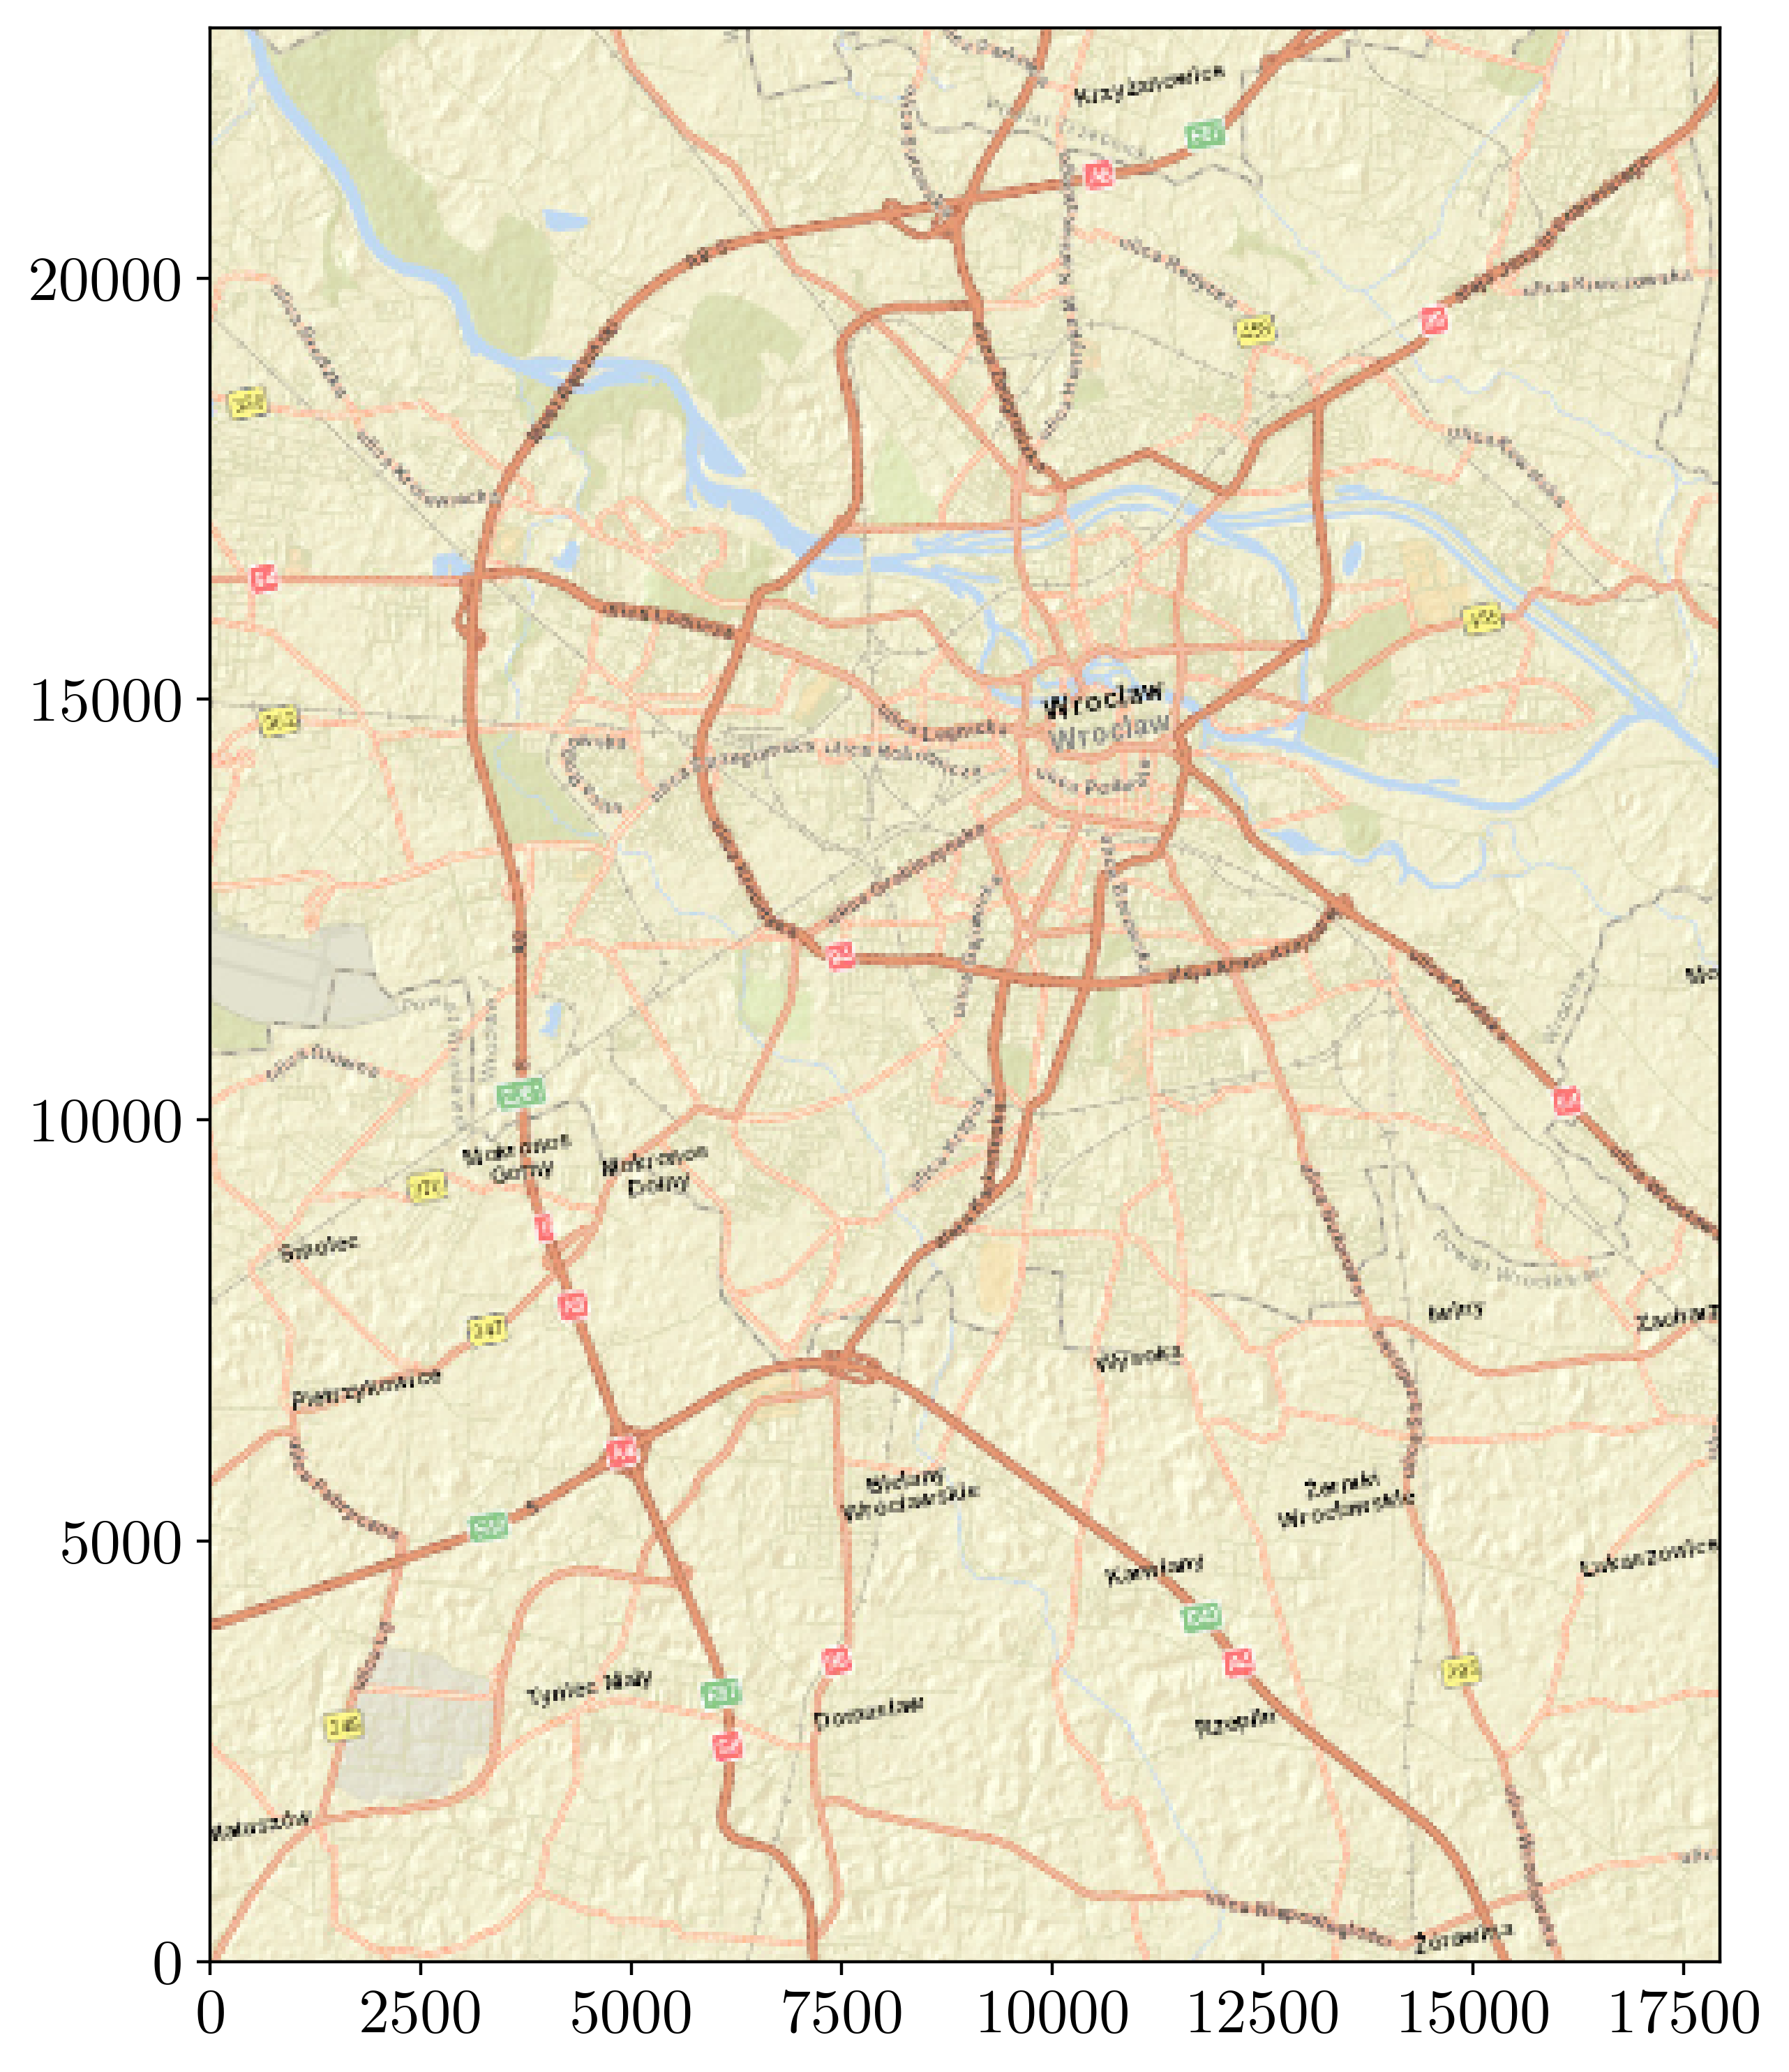

In [84]:
plt.figure(figsize=(16, 9), dpi=400)

wroclaw_map = Basemap(
    projection="cyl",
    llcrnrlon=16.85,
    llcrnrlat=51.00,
    urcrnrlon=17.16,
    urcrnrlat=51.17,
    resolution="f",
    suppress_ticks=False,
    epsg=5520
)

wroclaw_map.arcgisimage(service='World_Street_Map', verbose=True, dpi=400)  #,xpixels=1920, ypixels=1080)

In [85]:
# wroclaw_map = Basemap(
#     projection="merc",
#     llcrnrlon=16.85,
#     llcrnrlat=51.00,
#     urcrnrlon=17.16,
#     urcrnrlat=51.17,
#     lat_ts=0,
#     resolution="f",
#     suppress_ticks=True,
# )

In [86]:
mx, my = wroclaw_map(
    df_geo_location_bicycle_dataset["longitude"].values,
    df_geo_location_bicycle_dataset["latitude"].values,
)
pos = {}
for count, elem in enumerate(df_geo_location_bicycle_dataset["station_name"]):
    pos[elem] = (mx[count], my[count])

Text(0.5, 1.0, 'Bicycles')

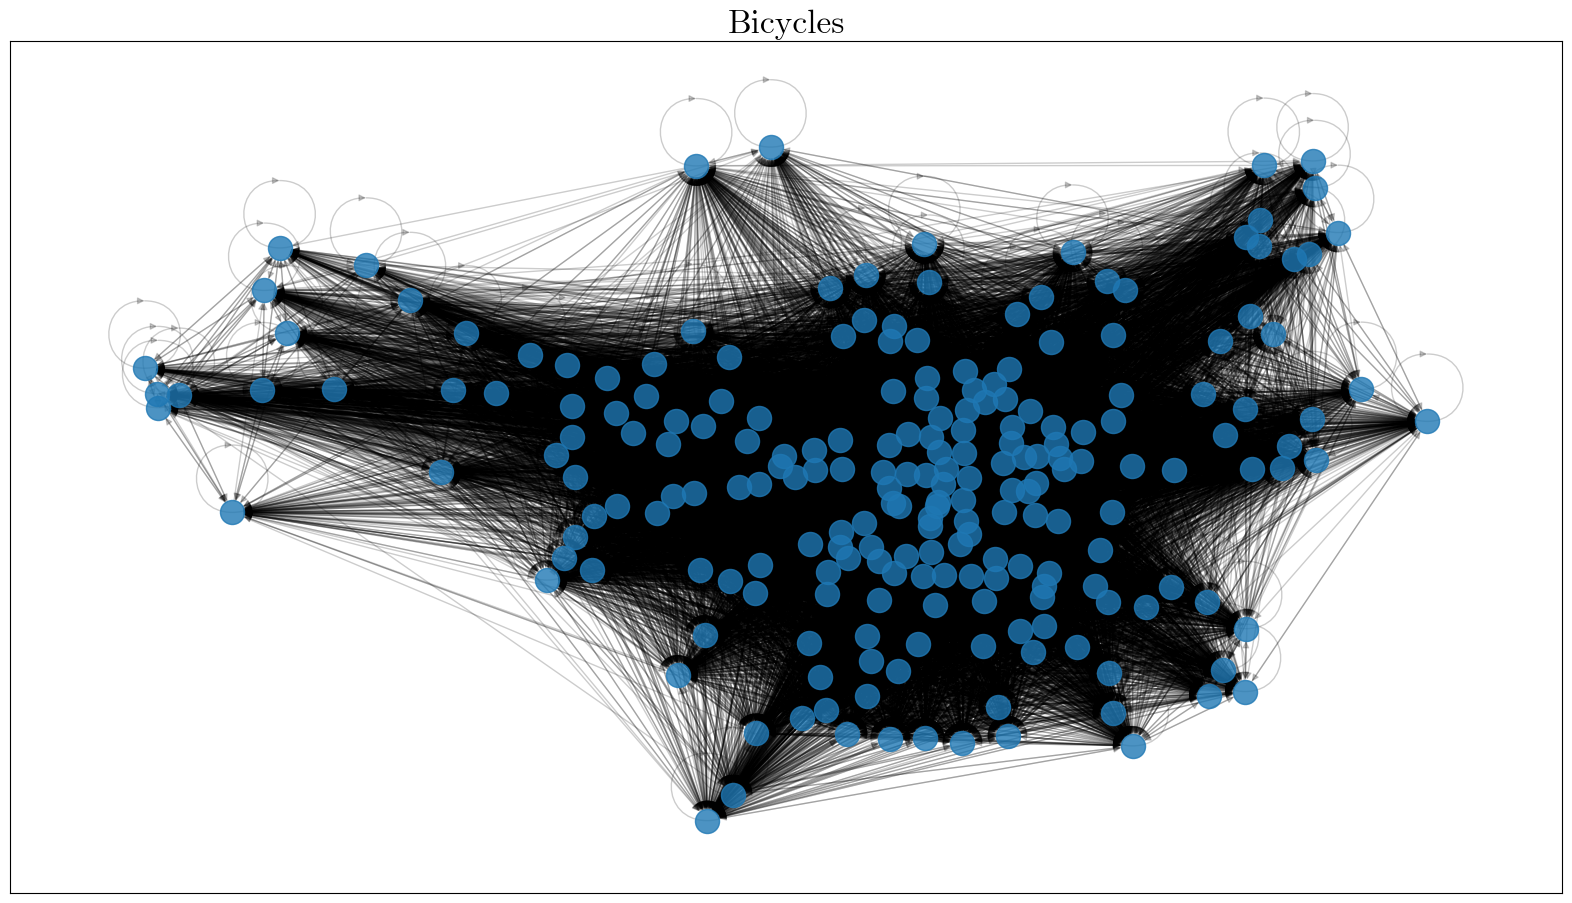

In [87]:
degrees = dict(nx.degree(graph))
plt.figure(figsize=(16, 9))
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=graph.nodes(),
    alpha=0.8,
)
nx.draw_networkx_edges(G=graph, pos=pos, alpha=0.2, arrows=True)
# nx.draw_networkx_labels(
#     G=graph,
#     pos=pos,
#     font_size=15,
#     labels={x: x for x in graph.nodes() if degrees[x] >= 10},
# )

plt.title("Bicycles", fontsize=24)